In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import joblib
import os
from imblearn.over_sampling import SMOTE
import time


In [2]:
# 创建保存结果的文件夹
# Create a folder where the results are saved
result_dir = 'results/random_forest_results'
os.makedirs(result_dir, exist_ok=True)

In [3]:
# 加载数据
# Load the data
print("加载数据")
start_time = time.time()
file_path = 'data/train.csv'
data = pd.read_csv(file_path)
print(f"数据加载完毕，耗时 {time.time() - start_time:.2f} 秒")

加载数据
数据加载完毕，耗时 5.54 秒


In [4]:
# 处理缺失值
# Missing values are processed, populated with the average of the columns
print("处理缺失值")
data.fillna(data.mean(), inplace=True)

处理缺失值


In [5]:
# 编码离散特征
# Encode discrete features
print("编码离散特征")
label_encoders = {}

编码离散特征


In [6]:
# 标准化数值特征
# Normalize numeric features
print("标准化数值特征")
scaler = StandardScaler()
num_features = [col for col in data.columns if 'num' in col]
data[num_features] = scaler.fit_transform(data[num_features])

标准化数值特征


In [7]:
# 拆分数据集
# Split the dataset
print("拆分数据集")
X = data.drop(columns=['id', 'target'])
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

拆分数据集


In [8]:
# 重新平衡训练数据
# Rebalance training data
print("重新平衡训练数据")
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)

重新平衡训练数据


In [9]:
# 训练随机森林模型
# Train a random forest model
print("训练随机森林模型")
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced', n_jobs=-1)
rf_model.fit(X_train_res, y_train_res)
y_pred_rf = rf_model.predict_proba(X_test)[:, 1]
auc_rf = roc_auc_score(y_test, y_pred_rf)

训练随机森林模型


In [10]:
# 保存模型
# Save the model
model_file = os.path.join(result_dir, 'rf_model.pkl')
joblib.dump(rf_model, model_file)

['results/random_forest_results\\rf_model.pkl']

In [11]:
# 输出AUC得分
# Output AUC score
print(f'随机森林模型的 AUC: {auc_rf}')

随机森林模型的 AUC: 0.8721438847828069


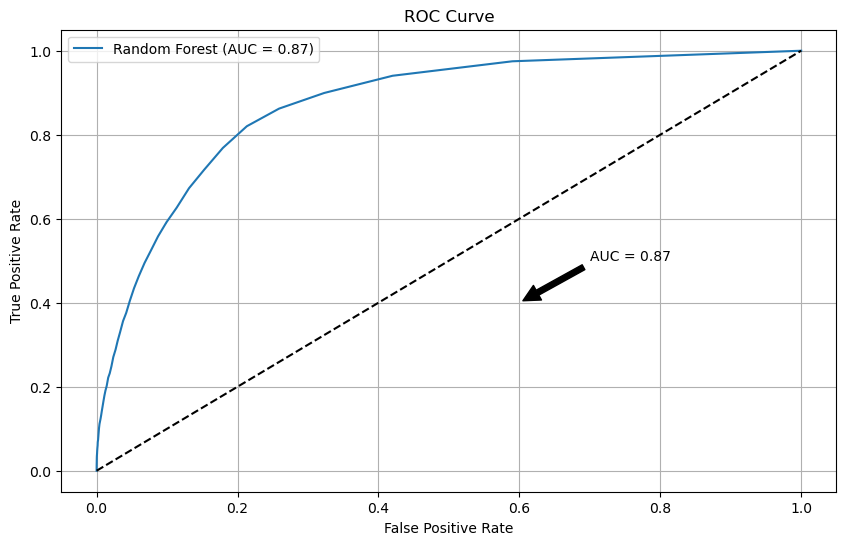

In [12]:
# 生成并保存ROC曲线
# Generate and save ROC curves
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rf)

plt.figure(figsize=(10, 6))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {auc_rf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='best')
plt.grid()
roc_curve_file = os.path.join(result_dir, 'roc_curve_rf.png')
plt.savefig(roc_curve_file)
plt.annotate(f'AUC = {auc_rf:.2f}', xy=(0.6, 0.4), xytext=(0.7, 0.5), arrowprops=dict(facecolor='black', shrink=0.05))
plt.show()

In [13]:
# 计算混淆矩阵
# Calculate the confusion matrix
cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))

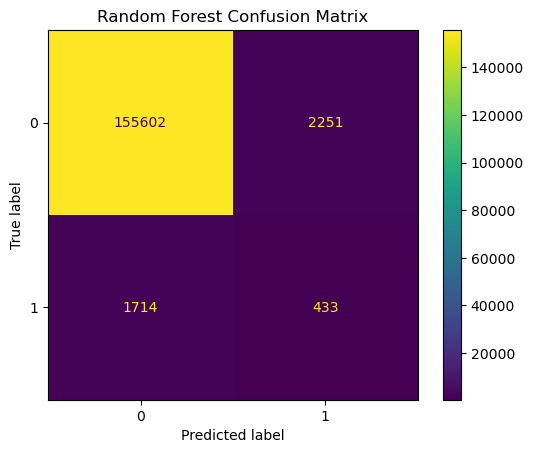

In [14]:
# 显示混淆矩阵
# Show confusion matrix
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf)
disp_rf.plot()
plt.title('Random Forest Confusion Matrix')
confusion_matrix_file = os.path.join(result_dir, 'confusion_matrix_rf.png')
plt.savefig(confusion_matrix_file)
plt.show()

In [15]:
# 保存预测结果到CSV文件
# Save the prediction results to a CSV file
test_results = pd.DataFrame({
    'id': data.iloc[X_test.index]['id'],
    'y_pred_rf': y_pred_rf,
    'true_label': y_test
})

test_results.to_csv(os.path.join(result_dir, 'test_predictions_rf.csv'), index=False)
print(f"预测结果已保存到 {os.path.join(result_dir, 'test_predictions_rf.csv')}")


预测结果已保存到 results/random_forest_results\test_predictions_rf.csv
